Capstone Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
data_frame = pd.read_csv('ifood_df.csv')
data_frame.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [2]:
# Removing Duplicates
data_frame.drop_duplicates(inplace = True)

In [3]:
# Checking Null duplicates
data_frame.isnull().any()

Income                  False
Kidhome                 False
Teenhome                False
Recency                 False
MntWines                False
MntFruits               False
MntMeatProducts         False
MntFishProducts         False
MntSweetProducts        False
MntGoldProds            False
NumDealsPurchases       False
NumWebPurchases         False
NumCatalogPurchases     False
NumStorePurchases       False
NumWebVisitsMonth       False
AcceptedCmp3            False
AcceptedCmp4            False
AcceptedCmp5            False
AcceptedCmp1            False
AcceptedCmp2            False
Complain                False
Z_CostContact           False
Z_Revenue               False
Response                False
Age                     False
Customer_Days           False
marital_Divorced        False
marital_Married         False
marital_Single          False
marital_Together        False
marital_Widow           False
education_2n Cycle      False
education_Basic         False
education_

In [4]:
# Remove Null values incase awe have any
thresh = len(data_frame)*0.6
data_frame.dropna(thresh=thresh, axis = 0).shape

(0, 39)

In [5]:
# convert Income from Float to Int
data_frame.Income.value_counts()
data_frame['Income'] = data_frame['Income'].apply(int)
data_frame.Income.value_counts()

7500     12
47025     3
35860     3
81361     2
57100     2
         ..
87305     1
76618     1
50272     1
58398     1
52869     1
Name: Income, Length: 1963, dtype: int64

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

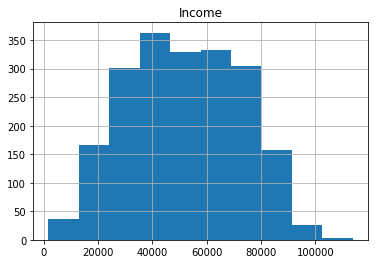

In [6]:
#Visualizations
data_frame.hist('Income')

In [7]:
numeric = data_frame._get_numeric_data()

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

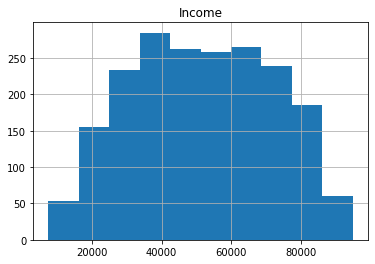

In [8]:
# Removing Extreme Outliers
data_frame_outliers = data_frame[(data_frame.Income < data_frame.Income.quantile(0.995)) & (data_frame.Income > data_frame.Income.quantile(0.005))]
data_frame_outliers.hist('Income')

In [9]:
# Sum of food purchased
data_frame['MntTotal'] = data_frame.loc[:,['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)
data_frame.MntTotal.head()



0    1529
1      21
2     734
3      48
4     407
Name: MntTotal, dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Customer_Days'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>],
       [<AxesSubplot:title={'center':'Teenhome'}>, <AxesSubplot:>]],
      dtype=object)

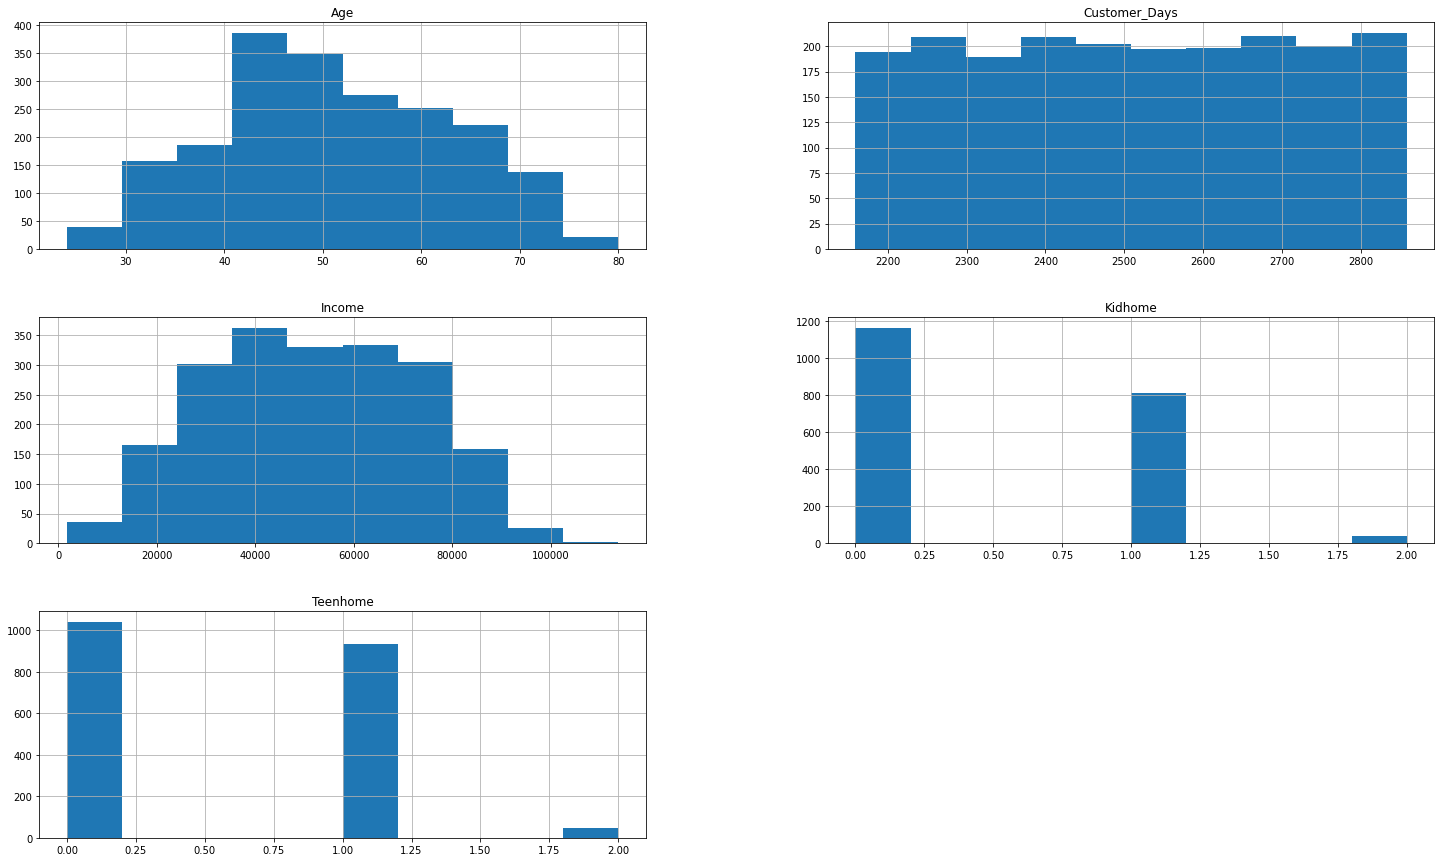

In [10]:
# Histograms
data_frame.hist( column = ['Age', 'Customer_Days', 'Income', 'Kidhome', 'Teenhome'], figsize=(25,15))


array([[<AxesSubplot:title={'center':'education_Basic'}>,
        <AxesSubplot:title={'center':'education_Graduation'}>],
       [<AxesSubplot:title={'center':'education_Master'}>,
        <AxesSubplot:title={'center':'education_PhD'}>]], dtype=object)

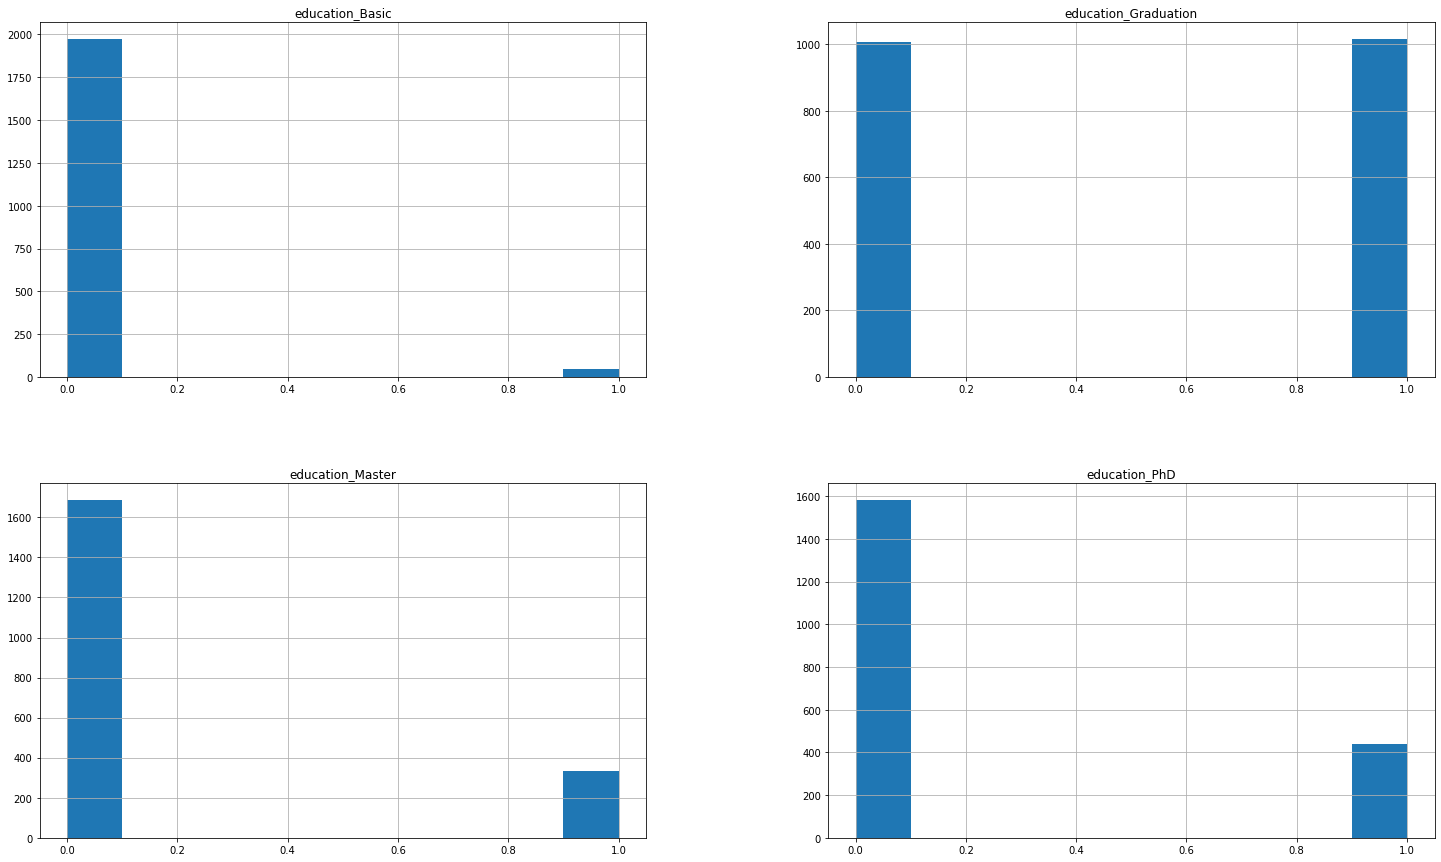

In [11]:
data_frame.hist( column = ['education_Basic', 'education_Graduation', 'education_Master', 'education_PhD'], figsize=(25,15))

array([[<AxesSubplot:title={'center':'marital_Divorced'}>,
        <AxesSubplot:title={'center':'marital_Married'}>],
       [<AxesSubplot:title={'center':'marital_Single'}>,
        <AxesSubplot:title={'center':'marital_Together'}>],
       [<AxesSubplot:title={'center':'marital_Widow'}>, <AxesSubplot:>]],
      dtype=object)

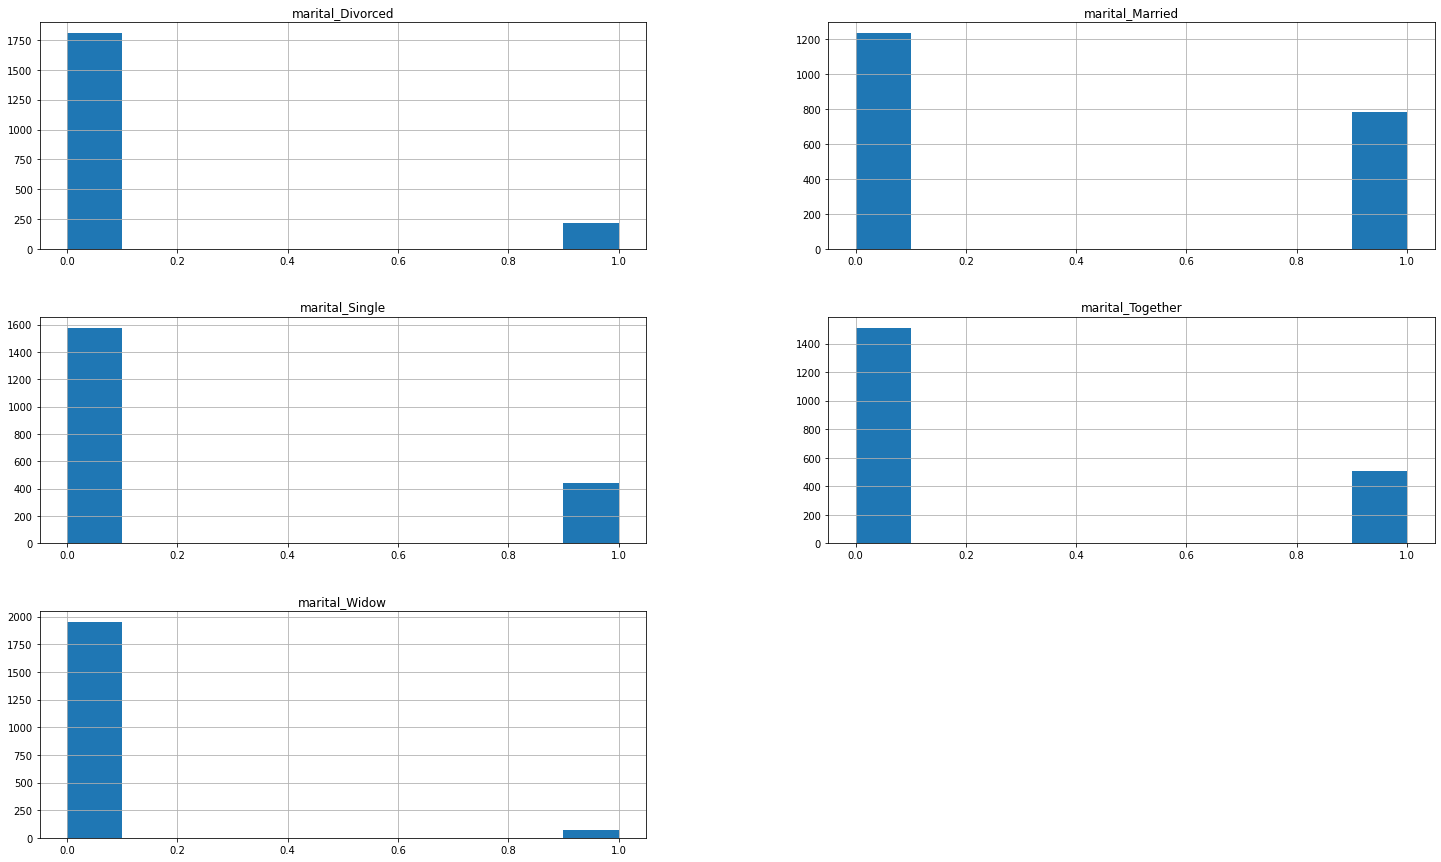

In [12]:
data_frame.hist( column = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow'], figsize=(25,15))

In [13]:
### Split Train and Test Model

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_frame, 
                        test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))



Train size:  1616 Test size:  405


In [15]:
### Train and evaluate a Linear Regression Model 

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['Income']]
y = train_set['AcceptedCmpOverall']

X_test = test_set[['Income']]
y_test = test_set['AcceptedCmpOverall']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred)) 

Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  -0.36513116283405317
 Coefficients [1.29545462e-05]
 Score 0.15410723940666216
MAE is  0.4339017663298705
RMSE is  0.6256317503683646
MSE is  0.3914150870689837
R^2  0.15410723940666216

Results for linear regression on test data
MAE is  0.429890094240842
RMSE is  0.6365937958507221
MSE is  0.4052516609156308
R^2  0.12858673726158432


C:\Users\tmishra\ds-venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


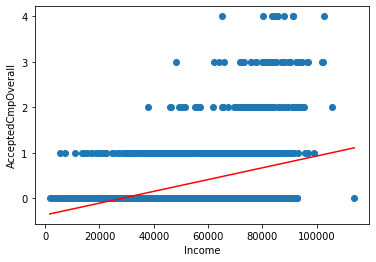

In [17]:
import matplotlib.pyplot as plt
Income = data_frame['Income']
AcceptedCmpOverall = data_frame['AcceptedCmpOverall']

min_Income = Income.min()
max_Income = Income.max()
points = 10
step_by = (max_Income - min_Income)/(points-1)
x_values = [min_Income + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)

plt.scatter(Income, AcceptedCmpOverall)
plt.xlabel('Income')
plt.ylabel('AcceptedCmpOverall')

plt.plot(x_values, y_values,c='red')
plt.show()

In [18]:
### Train and evaluate Pipelined Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler 


X = train_set[['Income']]
y = train_set['AcceptedCmpOverall']

X_test = test_set[['Income']]
y_test = test_set['AcceptedCmpOverall']


imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') 
poly4 = PolynomialFeatures(degree=4, include_bias=False) 
scale = StandardScaler() 
 
lr_model = LinearRegression()

stages = [('imp_mean', imp_mean), 
          ('poly4', poly4), 
          ('scale', scale), 
          ('lr_model', lr_model), 
         ] 
 
pipe_model = Pipeline(stages) 

pipe_model.fit(X,y)

y_pred = pipe_model.predict(X)
print('Results for pipeline linear regression on training data')
#print('  Default settings')
#print('Internal parameters:')
print('   Bias is ', pipe_model.predict([[0]])) 
#print('   Coefficients', pipe_model.coef_)
print('   Score', pipe_model.score(X,y))

print('MAE is  ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2    ', r2_score(y,y_pred))

y_test_pred = pipe_model.predict(X_test)
print()
print('Results for pipeline linear regression on test data')

print('MAE is  ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test,y_test_pred))




Results for pipeline linear regression on training data
   Bias is  [-0.18856947]
   Score 0.23885843951189856
MAE is   0.3863833271518894
RMSE is  0.5934632694451837
MSE is  0.35219865218056673
R^2     0.23885843951189856

Results for pipeline linear regression on test data
MAE is   0.37958023904177246
RMSE is  0.6037041853058047
MSE is  0.36445874335574535
R^2     0.2163038099249327


C:\Users\tmishra\ds-venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [20]:
##Train and evaluate Neural Network model

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

X = train_set[['Income','MntTotal']]
y = train_set['AcceptedCmpOverall']

X_test = test_set[['Income','MntTotal']]
y_test = test_set['AcceptedCmpOverall']

nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10),
                         solver='lbfgs')
nn_model.fit(X,y)

y_pred = nn_model.predict(X)


print('Results for NN on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = nn_model.predict(X_test)
print('Results for NN on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))



Results for NN on train data
  Default settings
Confusion Matrix
[[1256    0    0    0   12]
 [ 231    0    0    0   16]
 [  59    0    0    0    2]
 [  29    0    0    0    4]
 [   7    0    0    0    0]]
Accuracy is   0.7772277227722773
Precision is  0.6229612847504725
Recall is     0.7772277227722773
F1 is         0.6915963175264895

Results for NN on test data
  Default settings
Confusion Matrix
[[326   0   0   0   1]
 [ 52   0   0   0   2]
 [ 13   0   0   0   1]
 [  4   0   0   0   3]
 [  3   0   0   0   0]]
Accuracy is   0.8049382716049382
Precision is  0.6613437558161177
Recall is     0.8049382716049382
F1 is         0.7261098339719029


C:\Users\tmishra\ds-venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\tmishra\ds-venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tmishra\ds-venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

In [22]:
### Train and evaluate Random Forest model  

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  


X = train_set[['Income','MntTotal']]
y = train_set['AcceptedCmpOverall']

X_test = test_set[['Income','MntTotal']]
y_test = test_set['AcceptedCmpOverall']

rf_model = RandomForestClassifier(n_estimators=150) 
rf_model.fit(X,y)


y_pred = rf_model.predict(X)  
print('Results for Random Forest on training data') 
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = rf_model.predict(X_test) 
print('Results for Random Forest on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))




Results for Random Forest on training data
  Default settings
Confusion Matrix
[[1268    0    0    0    0]
 [   0  247    0    0    0]
 [   0    0   61    0    0]
 [   0    0    0   33    0]
 [   0    0    0    0    7]]
Accuracy is   1.0
Precision is  1.0
Recall is     1.0
F1 is         1.0

Results for Random Forest on test data
  Default settings
Confusion Matrix
[[303  21   2   1   0]
 [ 40  12   1   1   0]
 [  7   5   0   2   0]
 [  1   5   0   0   1]
 [  0   2   0   1   0]]
Accuracy is   0.7777777777777778
Precision is  0.7325482747704969
Recall is     0.7777777777777778
F1 is         0.7539882601829504


## Results on Classification Models
Basic results for our classification model to predict Campaign Acceptance based on Income and Total Purchase

| Model | Training Features | Acc Train | F1 Train |Acc Test | F1 Test |
|:---|:---|:---|:---|:---|:---|
|Neural Network|'Income','MntTotal'|78|69|80.74 |72.13 |
|Random Forest|'Income','MntTotal'|100|100|77.28|74.72|


## Results on Linear Regression

 Bias is -0.3651311628340533
 
 Coefficients [1.29545462e-05]
 
 Score 0.15410723940666216


Data type | MAE | RMSE | MSE | R^2

Train data | 0.43 | 0.62 | 0.39 | 0.15

Test data | 0.42 | 0.63 | 0.40 | 0.12


<AxesSubplot:>

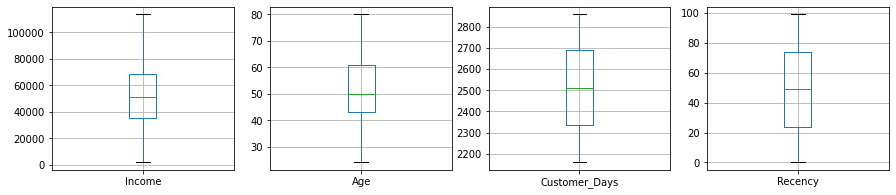

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,4, figsize=(15,3))

data_frame.boxplot(column=['Income'], ax=ax[0])
data_frame.boxplot(column=['Age'], ax=ax[1])
data_frame.boxplot(column=['Customer_Days'], ax=ax[2])
data_frame.boxplot(column=['Recency'], ax=ax[3])

Text(0.5, 1.0, 'Number of Web Visits vs Num of deals purchased')

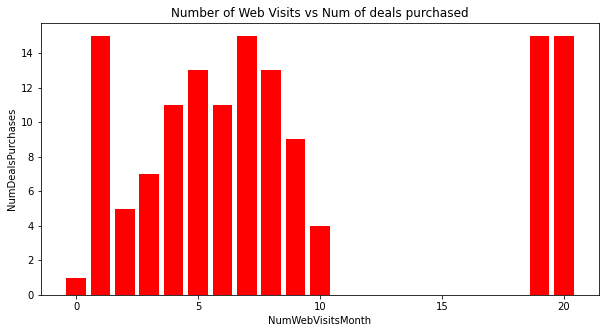

In [25]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

plt.bar(data_frame['NumWebVisitsMonth'], data_frame['NumDealsPurchases'], color='r')
plt.xlabel("NumWebVisitsMonth")
plt.ylabel("NumDealsPurchases")
plt.title("Number of Web Visits vs Num of deals purchased")

Text(0, 0.5, 'Dependents')

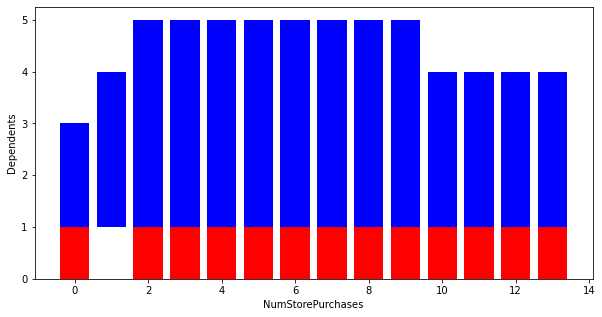

In [26]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
x=data_frame['NumStorePurchases']
y=data_frame['Kidhome']
y1=data_frame['Teenhome']
plt.bar(x, y, color='r')
plt.bar(x, y1, bottom=y+y1, color='b')
plt.xlabel("NumStorePurchases")
plt.ylabel("Dependents")

In [ ]:
%pip install seaborn

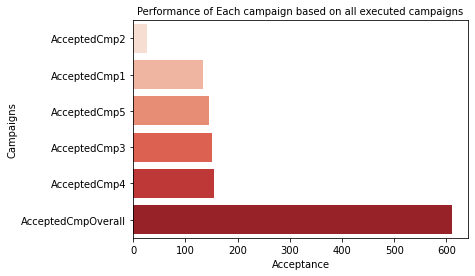

In [60]:

import pandas as pd
# calculate success rate (percent accepted)
campaigns = pd.DataFrame(data_frame[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmpOverall']].sum(), columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=campaigns.sort_values('Percent'), palette='Reds')
plt.xlabel('Acceptance')
plt.ylabel('Campaigns')
plt.title('Performance of Each campaign based on all executed campaigns', size=10);


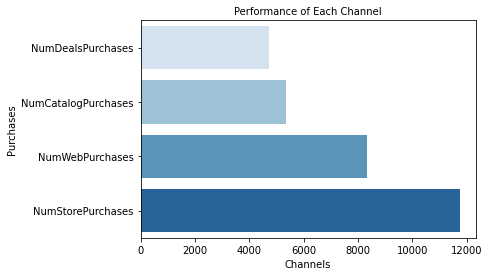

In [62]:

import pandas as pd
# calculate success rate (percent accepted)
campaigns = pd.DataFrame(data_frame[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(), columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=campaigns.sort_values('Percent'), palette='Blues')
plt.xlabel('Channels')
plt.ylabel('Purchases')
plt.title('Performance of Each Channel', size=10);

C:\Users\tmishra\AppData\Local\Temp\ipykernel_41960\931625615.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


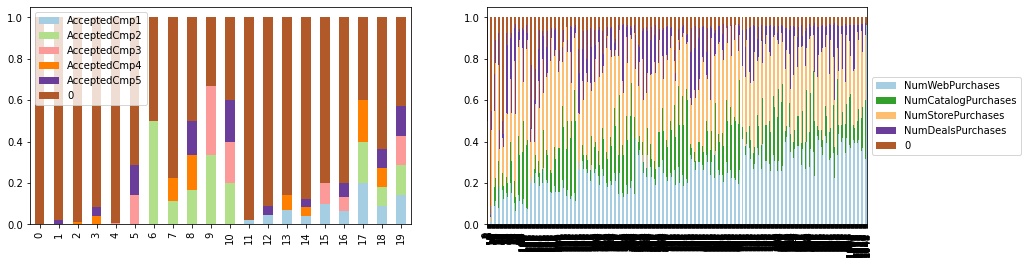

In [45]:
# Taking a look at the categorical variables
fig, ax = plt.subplots(1,2, figsize=(15,4))
df_plot = data_frame.groupby(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']).size().reset_index()
df_plot.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[0],  colormap='Paired')
df_plot = data_frame.groupby(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']).size().reset_index()
df_plot.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[1],  colormap='Paired')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
fig.show()